Lets import all the required libraries

In [96]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,precision_recall_curve,auc,roc_auc_score,recall_score,classification_report
from sklearn.metrics import f1_score
from collections import OrderedDict
from sklearn import svm
import random
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt

Lets read the data

In [2]:
df = pd.read_csv(r"F:\Python\Python(Additional Skill)\DS PROJECTS TO PRACTICE\Aspirasi\aps_failure_training_set1.csv")
df_test = pd.read_csv(r"F:\Python\Python(Additional Skill)\DS PROJECTS TO PRACTICE\Aspirasi\aps_failure_test_set.csv")

In [3]:
df_1 = df
df_test_1 = df_test
df_1.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


# Exploratory Data Analysis

Removing the missing values by rows which are more than 80% as threshold

Lets rename the target column to Flag and map neg to 0 and pos to 1 . Also map the na values to NULL.

In [5]:
df_1.set_index('class',inplace=True)
df_2 = df_1.replace(['na'],['0'])
df_3 = df_2.astype('int64')
df_3.dtypes

aa_000    int64
ab_000    int64
ac_000    int64
ad_000    int64
ae_000    int64
          ...  
ee_007    int64
ee_008    int64
ee_009    int64
ef_000    int64
eg_000    int64
Length: 170, dtype: object

In [6]:
df_3.reset_index('class',inplace=True)
df_4 = df_3.rename(columns = {'class' : 'Flag'})
df_4['Flag'] = df_4.Flag.map({'neg':0, 'pos':1})

In [7]:
df_4.head()

,Flag,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,0,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,0,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [8]:
df_4 = df_4.replace(0, np.nan)
df_4 = df_4.dropna(thresh=40,axis=0)
df_4 = df_4.replace(np.nan, 0)
df_4.shape

(59430, 171)

No of Columns : 171


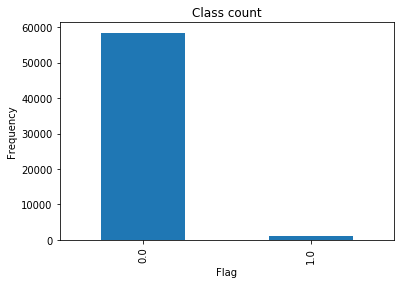

In [9]:
#Checking the distribution of Target Variables
Count = pd.value_counts(df_4['Flag'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Class count")
plt.xlabel("Flag")
plt.ylabel("Frequency")
print("No of Columns :",len(df_4.columns))

In [50]:
df_X = df_4.drop('Flag',axis=1)
df_Y = df_4[['Flag']]

Now we have test and training set. Lets create a validation set to tune our parameters for the model. 
I am splitting our training set here to 80% for training and 20% for validation since we have a separate test data.

In [51]:
X_train,X_validation,Y_train,Y_validation = train_test_split(df_X,df_Y,test_size = 0.2,random_state = 123)
DF = pd.concat([X_train,Y_train],axis = 1)

print("Percentage Neg in training: ", (len(Y_train[Y_train.Flag == 0])/len(Y_train))*100)
print("Percentage Pos in training: ", (len(Y_train[Y_train.Flag == 1])/len(Y_train))*100)
print("Total number of datapoints in training: ", len(Y_train))


print("Percentage Neg in Validation: ", (len(Y_validation[Y_validation.Flag == 0])/len(Y_validation))*100)
print("Percentage Pos in Validation: ", (len(Y_validation[Y_validation.Flag == 1])/len(Y_validation))*100)
print("Total number of datapoints in Validation: ", len(Y_validation))

Percentage Neg in training:  98.38044758539458
Percentage Pos in training:  1.619552414605418
Total number of datapoints in training:  47544
Percentage Neg in Validation:  98.19956251051657
Percentage Pos in Validation:  1.8004374894834259
Total number of datapoints in Validation:  11886


In [57]:
Y_validation.tail(5)

,Flag
747,0.0
15453,0.0
1494,0.0
7964,0.0
31845,0.0


Now we have training,validation and test data sets. Since our dataset is highly imbalanced. lets do some sampling. 
I am going with undersampling here.

In [54]:
numberofrecords_pos = len(DF[DF.Flag == 1])
pos_indices = np.array(DF[DF.Flag == 1].index)

#Picking the indices of the normal class
neg_indices = DF[DF.Flag == 0].index

#out of indices selected, randomly select "x" number of records
random_neg_indices = np.random.choice(neg_indices, numberofrecords_pos, replace = False)
random_neg_indices =np.array(random_neg_indices)

#Appending the two indices
under_sample_indices = np.concatenate([pos_indices,random_neg_indices])

#Undersample dataset
under_sample_data = DF.loc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:,under_sample_data.columns != 'Flag']
Y_undersample = under_sample_data.loc[:,under_sample_data.columns == 'Flag']

print("Percentage Neg: " , len(under_sample_data[under_sample_data.Flag == 0])/len(under_sample_data))
print("Percentage Pos : ", len(under_sample_data[under_sample_data.Flag == 1])/len(under_sample_data))
print("Total number of datapoints : ", len(under_sample_data))

Percentage Neg:  0.5
Percentage Pos :  0.5
Total number of datapoints :  1540


Now we have undersampled data. Lets try out some models.

## Logistic Regression

Lets see how it works out.

In [84]:
lr = LogisticRegression(C =0.001,penalty = 'l2')

lr.fit(X_undersample,Y_undersample.values.ravel())

y_pred = lr.predict(X_validation)

print(confusion_matrix(Y_validation,y_pred),'confusion_matrix')

[[11231   441]
 [   18   196]] confusion_matrix


D:\ANACONDA\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [85]:
print(metrics.classification_report(Y_validation,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     11672
         1.0       0.31      0.92      0.46       214

    accuracy                           0.96     11886
   macro avg       0.65      0.94      0.72     11886
weighted avg       0.99      0.96      0.97     11886



## GaussianNB

In [88]:
gnb=GaussianNB()

gnb.fit(X_undersample,Y_undersample.values.ravel())

y_pred_gnb =gnb.predict(X_validation)

print(confusion_matrix(Y_validation,y_pred_gnb),'confusion_matrix')

[[11273   399]
 [   18   196]] confusion_matrix


In [80]:
print(metrics.classification_report(Y_validation,y_pred_gnb))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     11672
         1.0       0.33      0.92      0.48       214

    accuracy                           0.96     11886
   macro avg       0.66      0.94      0.73     11886
weighted avg       0.99      0.96      0.97     11886



## DecisionTree

In [87]:
DT=DecisionTreeClassifier( random_state =0,criterion='entropy')

DT.fit(X_undersample,Y_undersample.values.ravel())

y_pred_DT=DT.predict(X_validation)

print(metrics.classification_report(Y_validation,y_pred_DT))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     11672
         1.0       0.20      0.96      0.33       214

    accuracy                           0.93     11886
   macro avg       0.60      0.95      0.64     11886
weighted avg       0.98      0.93      0.95     11886



In [83]:
print(confusion_matrix(Y_validation,y_pred_DT),'confusion_matrix')

[[10825   847]
 [    8   206]] confusion_matrix


## RANDOMFOREST

In [89]:
RF=RandomForestClassifier(n_estimators=300, random_state =0,criterion='entropy')

RF.fit(X_undersample,Y_undersample.values.ravel())

y_pred_rf=RF.predict(X_validation)

print(metrics.classification_report(Y_validation,y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     11672
         1.0       0.25      0.98      0.40       214

    accuracy                           0.95     11886
   macro avg       0.62      0.96      0.68     11886
weighted avg       0.99      0.95      0.96     11886



In [90]:
print(confusion_matrix(Y_validation,y_pred_rf),'confusion_matrix')

[[11040   632]
 [    4   210]] confusion_matrix


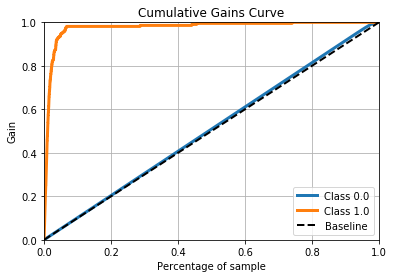

In [98]:
y_pred_rftest  = RF.predict_proba(X_validation)
skplt.metrics.plot_cumulative_gain(Y_validation,y_pred_rftest)

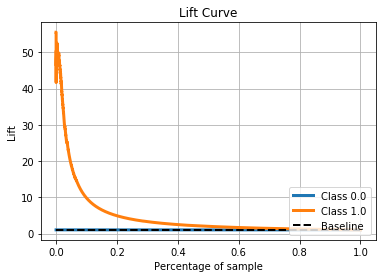

In [99]:
y_pred_rftest  = RF.predict_proba(X_validation)
skplt.metrics.plot_lift_curve(Y_validation,y_pred_rftest)

D:\ANACONDA\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


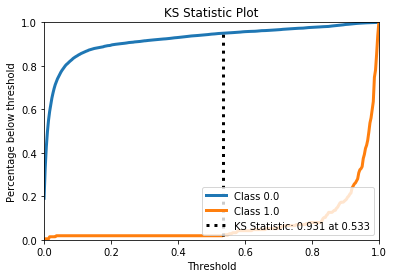

In [100]:
y_pred_rftest  = RF.predict_proba(X_validation)
skplt.metrics.plot_ks_statistic(Y_validation,y_pred_rftest)
plt.show()

D:\ANACONDA\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


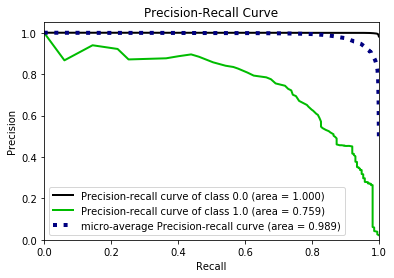

In [103]:
y_pred_rftest  = RF.predict_proba(X_validation)
skplt.metrics.plot_precision_recall_curve(Y_validation,y_pred_rftest)
plt.show()

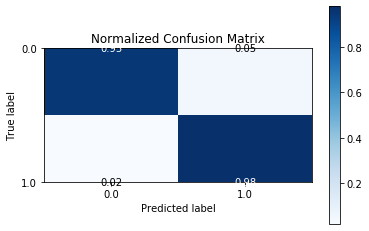

In [106]:
skplt.metrics.plot_confusion_matrix(Y_validation,y_pred_rf, normalize=True)
plt.show()

Based on Recall score for this use case, RandomForest Performance best, will save the model and score the data in test data

# Score Data

In [125]:
#df_test_1.set_index('class',inplace=True)
df_test_2 = df_test_1.replace(['na'],['0'])
df_test_3 = df_test_2.astype('float').astype('int64')
df_test_3.reset_index('class',inplace=True)
df_test_4 = df_test_3.rename(columns = {'class' : 'Flag'})
df_test_4['Flag'] = df_test_4.Flag.map({'neg':0, 'pos':1})

In [146]:
df_4.head(5)

,Flag,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [128]:
df_test_4['Flag'].value_counts()

0    15625
1      375
Name: Flag, dtype: int64

In [129]:
df_test_4 = df_test_4.replace(0, np.nan)
df_test_4 = df_test_4.dropna(thresh=40,axis=0)
df_test_4 = df_test_4.replace(np.nan, 0)
df_test_4.shape

(15840, 171)

In [130]:
df_test_X = df_test_4.drop('Flag',axis=1)
df_test_Y = df_test_4[['Flag']]

In [132]:
y_pred_test_rf=RF.predict(df_test_X)

In [145]:
print("Accuracy Score:",metrics.accuracy_score(df_test_Y,y_pred_test_rf)*100)
print("Recall Score:",recall_score(df_test_Y,y_pred_test_rf)*100)
print(metrics.confusion_matrix(df_test_Y,y_pred_test_rf, normalize=True),'confusion_matrix')

Accuracy Score: 94.91161616161617
Recall Score: 98.09264305177112
[[14674   799]
 [    7   360]] confusion_matrix


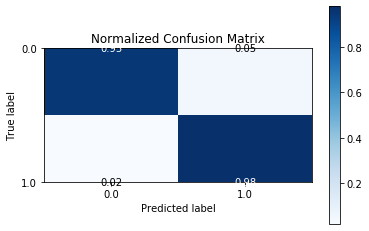

<Figure size 1296x1008 with 0 Axes>

In [141]:
skplt.metrics.plot_confusion_matrix(df_test_Y,y_pred_test_rf, normalize=True)
plt.figure(figsize=(18,14))
plt.show()